In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('kc_house_data.csv')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [8]:
from sklearn.feature_selection import mutual_info_regression
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,confusion_matrix,roc_auc_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [9]:
%matplotlib inline

In [10]:
df.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
16567,7603100095,20141110T000000,1260000.0,3,3.00,3230,8625,2.0,0,3,...,10,2220,1010,1998,0,98116,47.5620,-122.404,2330,6022
3542,1563100705,20140912T000000,690000.0,4,3.50,1930,5400,1.5,0,2,...,7,1930,0,1920,0,98116,47.5679,-122.409,1500,3340
21163,1099950050,20141229T000000,620000.0,4,3.50,3880,8244,2.0,0,0,...,10,3060,820,2007,0,98019,47.7426,-121.976,3180,10947
8107,1683900040,20141215T000000,330000.0,3,2.25,1440,5150,2.0,0,0,...,7,1440,0,1997,0,98106,47.5456,-122.356,1530,5238
12696,2344300220,20140714T000000,1100000.0,4,3.50,2210,7597,1.0,0,0,...,9,1550,660,1977,2006,98004,47.5816,-122.197,2370,8811
9844,9552701000,20150316T000000,818000.0,4,2.25,2460,8001,2.0,0,0,...,8,2460,0,1984,0,98006,47.5480,-122.154,2460,9126
2082,4401200350,20150210T000000,822500.0,3,2.50,3090,7708,2.0,0,0,...,10,3090,0,1999,0,98052,47.6868,-122.108,3140,8592
690,9133600075,20140821T000000,373000.0,3,1.75,1830,11788,1.0,0,1,...,8,1430,400,1958,0,98055,47.4862,-122.224,2140,11964
17993,4254000620,20141007T000000,410000.0,3,2.50,1860,15457,2.0,0,0,...,8,1860,0,1997,0,98019,47.7383,-121.955,2040,14055
6697,8651610660,20150429T000000,769000.0,4,2.50,2440,6733,2.0,0,0,...,9,2440,0,1999,0,98074,47.6374,-122.064,2570,6496


In [11]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [14]:
df.shape

(21613, 21)

In [16]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [17]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [18]:
df_new = df.copy()

In [19]:
df_new = df_new[['price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode']]
df_new.head(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074


In [21]:
feature_cols = ['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode']
X = df_new[feature_cols]
Y = df_new['price']
# Divide the data into test and train data set
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=1)

In [23]:
X_test.shape

(6484, 14)

In [24]:
Standardscaler = StandardScaler()
X_train_colmn = X_train.columns
X_train_SS = pd.DataFrame(Standardscaler.fit_transform(X_train),columns = X_train_colmn )
X_train_SS.head(2)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode
0,-0.393550,-0.152345,-0.595960,-0.207161,-0.920449,-0.087901,-0.303647,-0.629308,-0.565486,-0.300744,-0.664205,0.914405,-0.209648,-0.745393
1,-1.461345,-1.462646,-1.404175,-0.186186,-0.920449,-0.087901,-0.303647,2.439444,-1.421781,-1.193915,-0.664205,-0.921398,-0.209648,1.683322


In [25]:
mutual_info = mutual_info_regression(X_train_SS.fillna(0), y_train)
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train_SS.columns
mutual_info.sort_values(ascending=False)

zipcode          0.395575
sqft_living      0.350683
grade            0.329852
sqft_above       0.259764
bathrooms        0.201251
bedrooms         0.082008
yr_built         0.077512
floors           0.070020
sqft_basement    0.067925
sqft_lot         0.064260
view             0.055290
waterfront       0.013474
yr_renovated     0.007608
condition        0.006964
dtype: float64

In [26]:
Req_Columns = list(mutual_info[mutual_info>0.05].index)
Req_Columns

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'view',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'zipcode']

In [28]:
Train_SS = X_train_SS[Req_Columns]
Train_SS.head(3)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,grade,sqft_above,sqft_basement,yr_built,zipcode
0,-0.393550,-0.152345,-0.595960,-0.207161,-0.920449,-0.303647,-0.565486,-0.300744,-0.664205,0.914405,-0.745393
1,-1.461345,-1.462646,-1.404175,-0.186186,-0.920449,-0.303647,-1.421781,-1.193915,-0.664205,-0.921398,1.683322
2,-0.393550,-1.462646,-1.348817,-0.110694,-0.920449,-0.303647,-1.421781,-1.132739,-0.664205,-0.581434,1.272309


In [29]:
Standardscaler = StandardScaler()
X_test_columns = X_test.columns
X_test_SS = pd.DataFrame(Standardscaler.fit_transform(X_test),columns = X_test_columns )
#--------------------
#Creating the Testing ADS with selected columns
Test_SS = X_test_SS[Req_Columns]
print(Test_SS.shape)
Test_SS.head(3)

(6484, 11)


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,grade,sqft_above,sqft_basement,yr_built,zipcode
0,0.681985,0.812534,0.741232,-0.224828,0.958088,-0.310653,1.132754,1.167660,-0.646077,0.998294,-0.374868
1,-0.411214,0.176514,-0.476079,-0.228944,-0.903816,-0.310653,-0.543753,-0.568170,0.068726,0.520034,-1.254174
2,-1.504414,-0.777515,0.300481,4.617035,0.958088,-0.310653,2.809260,0.675059,-0.646077,1.169102,-0.618081


## Creating function for evaluating metrics

In [30]:
def evaluation(Y_test,Y_pred):
    acc=accuracy_score(Y_test,np.round(Y_pred))
    rcl=recall_score(Y_test,Y_pred, average='weighted')
    f1=f1_score(Y_test,Y_pred, average='weighted')
    auc_score=roc_auc_score(Y_test,Y_pred, average='weighted')
    prec_score=precision_score(Y_test,Y_pred, average='weighted')
    r2 = r2_score(Y_test, Y_pred)
    
    metric_dict={'accuracy': round(acc,3),
               'recall': round(rcl,3),
               'F1 score': round(f1,3),
               'auc score': round(auc_score,3),
               'precision': round(prec_score,3),
               'R2 Score' : round(r2,3)
              }
    return print(metric_dict)

## Decision Tree

In [31]:
decTree_reg = DecisionTreeRegressor()
#Train the model with train data set
decTree_reg = decTree_reg.fit(Train_SS, y_train)

# Predict the data
y_pred = decTree_reg.predict(Test_SS)
r2_dt = r2_score(y_test, y_pred)
#evaluation(y_test, y_pred)
print("Accuracy on Training set: ",decTree_reg.score(Train_SS,y_train))
print("Accuracy on Testing set: ",decTree_reg.score(Test_SS,y_test))
print("R2 score", r2_dt)

Accuracy on Training set:  0.9993142836070922
Accuracy on Testing set:  0.6349083681033845
R2 score 0.6349083681033845


## Linear Regression

In [32]:
linear_reg = LinearRegression()
linear_reg.fit(Train_SS, y_train)
y_pred= linear_reg.predict(Test_SS)
r2_ln=r2_score(y_test,y_pred)
print("Accuracy on Training set: ",linear_reg.score(Train_SS,y_train))
print("Accuracy on Testing set: ",round(linear_reg.score(Test_SS,y_test),2))

Accuracy on Training set:  0.6343579723851325
Accuracy on Testing set:  0.63


## KNeighbors Regressor

In [34]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(Train_SS, y_train)
y_pred= neigh.predict(Test_SS)
r2_KN=r2_score(y_test,y_pred)
print("Accuracy on Training set: ",neigh.score(Train_SS,y_train))
print("Accuracy on Testing set: ",neigh.score(Test_SS,y_test))
print("R2 score", r2_KN)

Accuracy on Training set:  0.8766494394637693
Accuracy on Testing set:  0.6801387630084237
R2 score 0.6801387630084237


Max Accuracy error:- 0.7011520390741177 at K = 5


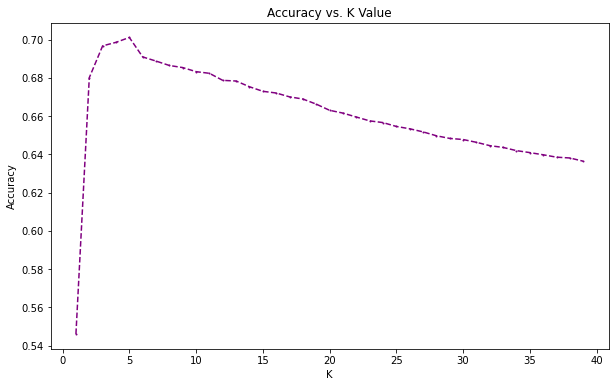

In [38]:
score = []
for i in range(1,40):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(Train_SS, y_train)
    pred_i = knn.predict(Test_SS)
    r2_KN_i=r2_score(y_test,pred_i)
    score.append(r2_KN_i)

plt.figure(figsize=(10,6))
plt.plot(range(1,40),score,color='purple', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=1)
plt.title('Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Max Accuracy error:-",max(score),"at K =",score.index(max(score))+1)

## RandomForest Regressor

In [36]:
reg_rf = RandomForestRegressor()
reg_rf.fit(Train_SS, y_train)
y_pred= reg_rf.predict(Test_SS)
r2_rf=r2_score(y_test,y_pred)
print("Accuracy on Training set: ",reg_rf.score(Train_SS,y_train))
print("Accuracy on Testing set: ",reg_rf.score(Test_SS,y_test))
print("R2 score", r2_rf)

Accuracy on Training set:  0.9710594368702156
Accuracy on Testing set:  0.7922040491133998
R2 score 0.7922040491133998
